# Saha code

Based on paper by [Seungtaek](https://iopscience.iop.org/article/10.1088/1361-6587/ac7ee8/pdf)

#### Ionization Potential Depression (from continuum lowering)
We assume some average ionization level $\bar{Z} \equiv n_e/n_0$ and also that the ionization is lower than 1 for simplicity.

In atomic units, we have 
$$
\Delta \chi = (\bar{Z} + 1)\sqrt{4 \pi \frac{\bar{Z} (\bar{Z}+1)n_0}{T_e}}
$$
Then the Saha equation is in the singly ionized limit is
$$
\frac{\bar{Z}^2 }{1-\bar{Z}} = \frac{2 g_1}{n_0 g_0} \left(\frac{m_e T_e}{2 \pi}\right)^{3/2} \exp \left[\beta (\chi_0 - \Delta \chi )\right].
$$
Where $g_0$ and $g_1$ are the degeneracy parameters for neutral and singly ionized species. 

#### Argon
For argon this is $g_0=1$, and $g_1\approx 6$, which comes from the fact that S=1/2, L=1, so J={1/2, 3/2}, giving 2 + 4 = 6 total states that are approximately degenerate.

#### Xenon
I think it should be the same, as long as d-orbitals don't play a role...


For ionization energies, see [NIST](https://physics.nist.gov/cgi-bin/ASD/ie.pl?spectra=Xe&units=1&at_num_out=on&el_name_out=on&seq_out=on&shells_out=on&level_out=on&e_out=0&unc_out=on&biblio=on)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler


mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100

from constants import *

In [204]:
from scipy.optimize import root, least_squares

@np.vectorize
def Δχ_func(Zbar, n0, Te): # in AU 
    return np.min( [ (Zbar+1) * np.sqrt(4*π * Zbar*(Zbar+1)*n0/Te) , χ0_AU] )

def leftminusright_saha(Zbar, n0, Te):
    Δχ = Δχ_func(Zbar, n0, Te)
    left_hand_side = Zbar**2/(1 - Zbar) 
    right_hand_side = 2/n0 * g1/g0 * (m_e*Te/(2*π))**(3/2) * np.exp( -(χ0_AU - Δχ)/Te )
    return left_hand_side - right_hand_side

def leftminusrightsquare_saha(Zbar, n0, Te):
    Δχ = Δχ_func(Zbar, n0, Te)
    left_hand_side = Zbar**2/(1 - Zbar) 
    right_hand_side = 2/n0 * g1/g0 * (m_e*Te/(2*π))**(3/2) * np.exp( -(χ0_AU - Δχ)/Te )
    return (left_hand_side - right_hand_side)**2


@np.vectorize
def solve_Saha(Te, n0, Zbar_0=0.5):
    saha_LR = lambda Zbar: leftminusrightsquare_saha(Zbar, n0, Te) 
    ε = 1e-2
    sol =  least_squares(saha_LR, Zbar_0, bounds=(0,1), ftol=1e-10, xtol=1e-8, gtol=None, max_nfev = 1000)
    if sol.cost > 1e-8 or sol.success==False or sol.x<1e-10: #sol.grad > 1e-8 or sol.fun > 1e-8: 
        print(f"{sol.success}: Te={Te:0.3f}, n0={n0:0.1e}, Zbar_0={Zbar_0:0.3f}")
        print(sol)
        return np.nan, np.nan, sol
    return sol.x, Δχ_func(sol.x, n0, Te), sol


## Xenon

In [228]:
element='Xe'
g1 = 6 
g0 = 1
χ0_eV = 12.1298437  # eV See 
χ0_AU = χ0_eV*eV_to_AU

n0_invcc = 1.86e20
n0_AU = n0_invcc*invcc_to_AU

# array
T_K_array = np.geomspace(5e3, 3e4, num=100)
Zbar_0_list = np.linspace(5e-6,1-1e-6, num=10)
Saha_list = [ solve_Saha(T_K_array*K_to_AU, n0_AU, Zbar_0=Zbar_0) for Zbar_0 in Zbar_0_list] 


True: Te=0.019, n0=2.8e-05, Zbar_0=0.000
     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 5.045e-17]
           x: [ 9.773e-29]
        cost: 1.2724228266968035e-33
         jac: [[ 5.732e-12]]
        grad: [ 2.891e-28]
  optimality: 2.825870607897475e-56
 active_mask: [-1]
        nfev: 5
        njev: 5
True: Te=0.020, n0=2.8e-05, Zbar_0=0.000
     message: Both `ftol` and `xtol` termination conditions are satisfied.
     success: True
      status: 4
         fun: [ 1.218e-16]
           x: [ 3.131e-33]
        cost: 7.423441167106396e-33
         jac: [[ 1.347e-11]]
        grad: [ 1.642e-27]
  optimality: 5.140463697111946e-60
 active_mask: [-1]
        nfev: 6
        njev: 6
True: Te=0.020, n0=2.8e-05, Zbar_0=0.000
     message: Both `ftol` and `xtol` termination conditions are satisfied.
     success: True
      status: 4
         fun: [ 2.900e-16]
           x: [ 4.941e-324]
        cost: 4.204231411227594e-32
       

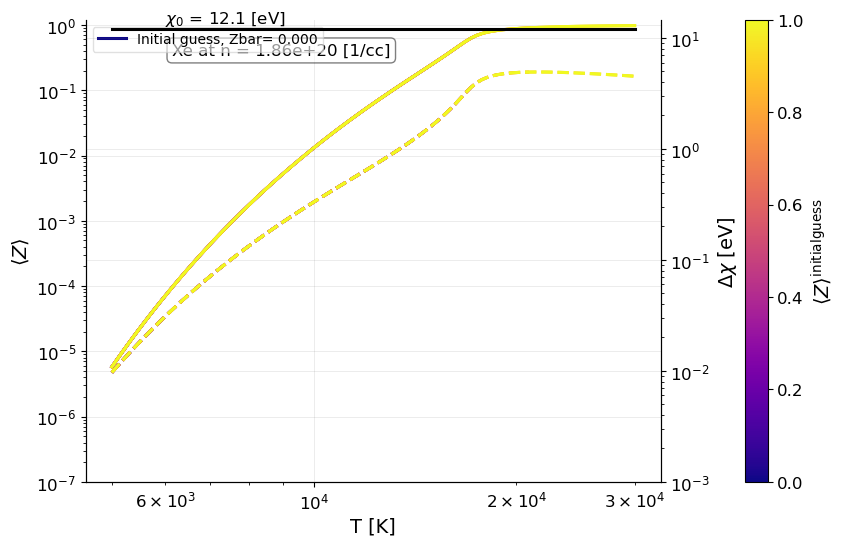

In [229]:
fig, ax = plt.subplots(figsize=(10,6))

# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

colors = plt.cm.plasma(np.linspace(0, 1,len(Saha_list))) #plt.cycler("color", plt.cm.jet(np.linspace(0,1,len(Saha_list))))



ax.set_ylabel(r"$\langle Z \rangle$")#,color=colors[0])
ax.set_xlabel("T [K]")
ax.set_xscale('log')

ax2 = ax.twinx()
# ax2.plot(T_K_array, Δχ_Saha*AU_to_eV,'--.',color=colors[1])
ax2.set_ylabel(r"$\Delta \chi$ [eV]")#,color=colors[1])

for i, (Zbar_0, Saha) in enumerate(zip(Zbar_0_list, Saha_list)):
    if i==0:
        try:
            ax.plot(T_K_array, Saha[0],'-' , color=colors[i], label=f'Initial guess, Zbar= {Zbar_0:0.3f}')
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'--' , color=colors[i], label=r'$\chi_0$')
        except TypeError:
            pass
            
    else:
        try:
            ax.plot(T_K_array, Saha[0],'-' , color=colors[i])#, label=f'Initial guess, Zbar= {Zbar_0:0.3f}')
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'--' , color=colors[i])
        except TypeError:
            pass

# ax2.plot(T_K_array, Δχ_Saha_1*AU_to_eV,'-' ,color=colors[1])

ax2.plot(T_K_array, np.ones_like(T_K_array)*χ0_AU*AU_to_eV,'-' ,color='k')
ax2.text(np.min(T_K_array)*1.2, 1.01*χ0_AU*AU_to_eV, r"$\chi_0$ = {0:0.1f} [eV]".format(χ0_AU*AU_to_eV), fontsize=12,
        verticalalignment='bottom')#, bbox=props)

# Adding a manual colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
fig.colorbar(sm, ax=[ax, ax2], orientation='vertical', label=r'$\langle Z\rangle^{\rm initial guess}$')

plt.subplots_adjust(right=0.7)

# text
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
inset_text = f"{element} at n = {n0_invcc:0.2e} [1/cc]"
ax.text(0.15, 0.95, inset_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_ylim(1e-7,1.2)
ax2.set_ylim(1e-3,1.2*χ0_AU*AU_to_eV)

ax.set_yscale('log')
ax2.set_yscale('log')
ax.legend()
# plt.tight_layout()

# ax.set_yscale('log')

In [230]:
# Fix nan, None issues...

Zbar_list = np.array([Saha[0] for Saha in Saha_list])
χ0_list   = np.array([Saha[1] for Saha in Saha_list])
Zbar_mean, Zbar_std = np.nanmean(Zbar_list,axis=0), np.nanstd(Zbar_list,axis=0) 
χ0_mean, χ0_std = np.nanmean(χ0_list,axis=0), np.nanstd(χ0_list,axis=0) 


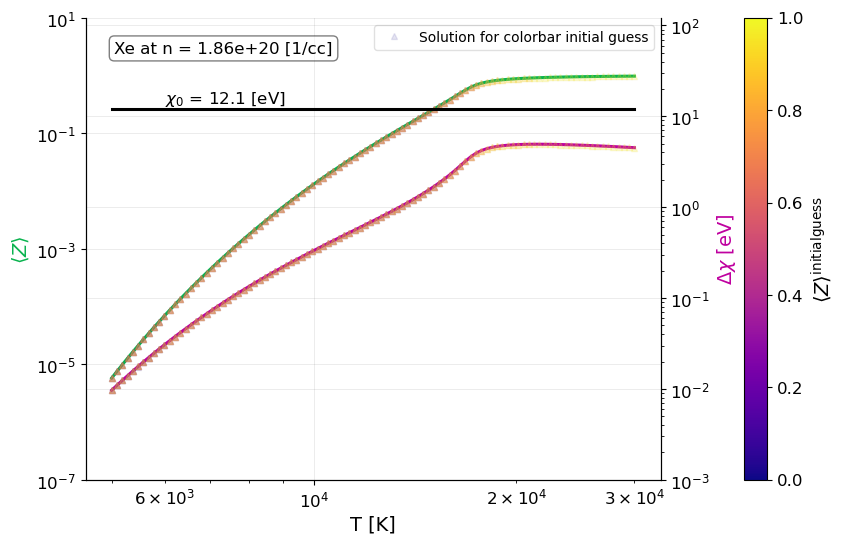

In [231]:
fig, ax = plt.subplots(figsize=(10,6))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.set_ylabel(r"$\langle Z \rangle$",color=colors[0])
ax.set_xlabel("T [K]")
ax.set_xscale('log')

ax2 = ax.twinx()
ax2.set_ylabel(r"$\Delta \chi$ [eV]",color=colors[1])

# Plot mean and Std
ax.plot(T_K_array, Zbar_mean,'-' , color=colors[0])#, label=f'Initial guess')
ax.fill_between(T_K_array, Zbar_mean - Zbar_std, Zbar_mean + Zbar_std, color=colors[0], alpha=0.2)
ax2.plot(T_K_array, χ0_mean*AU_to_eV,'-' , color=colors[1])#, label=r'$\chi_0$')
ax2.fill_between(T_K_array, (χ0_mean - χ0_std)*AU_to_eV, (χ0_mean + χ0_std)*AU_to_eV, color=colors[1], alpha=0.2, linestyle='-')
           

# Plot all actual solution output    
colors = plt.cm.plasma(np.linspace(0, 1,len(Saha_list))) #plt.cycler("color", plt.cm.jet(np.linspace(0,1,len(Saha_list))))

for i, (Zbar_0, Saha) in enumerate(zip(Zbar_0_list, Saha_list)):
    if i==0:
        try:
            ax.plot(T_K_array, Saha[0],'^' , color=colors[i], label=f'Solution for colorbar initial guess', alpha=0.1, markersize=5)
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'^' , color=colors[i], label=r'$\chi_0$', alpha=0.1, markersize=5)
        except TypeError:
            pass
            
    else:
        try:
            ax.plot(T_K_array, Saha[0],'^' , color=colors[i],alpha=0.1, markersize=5)
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'^' , color=colors[i],alpha=0.1, markersize=5)
        except TypeError:
            pass


# Plot χ0 Line
ax2.plot(T_K_array, np.ones_like(T_K_array)*χ0_AU*AU_to_eV,'-' ,color='k')
ax2.text(np.min(T_K_array)*1.2, 1.01*χ0_AU*AU_to_eV, r"$\chi_0$ = {0:0.1f} [eV]".format(χ0_AU*AU_to_eV), fontsize=12,
        verticalalignment='bottom')#, bbox=props)

# Adding a manual colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
fig.colorbar(sm, ax=[ax, ax2], orientation='vertical', label=r'$\langle Z\rangle^{\rm initial guess}$')

plt.subplots_adjust(right=0.7)

# text
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
inset_text = f"{element} at n = {n0_invcc:0.2e} [1/cc]"
ax.text(0.05, 0.95, inset_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_ylim(1e-7,10)
ax2.set_ylim(1e-3,10*χ0_AU*AU_to_eV)

ax.set_yscale('log')
ax2.set_yscale('log')
ax.legend()
# plt.tight_layout()

# ax.set_yscale('log')

## Argon

In [222]:
element='Ar'
g1 = 5.66 #6 
g0 = 1
χ0_eV = 15.8 # eV
χ0_AU = χ0_eV*eV_to_AU

n0_invcc = 2.53e21#6.3e26/1e6
n0_AU = n0_invcc*invcc_to_AU

# array
T_K_array = np.geomspace(1e3, 3e4, num=100)
Zbar_0_list = np.linspace(1e-6,1-1e-6, num=20)
Saha_list = [ solve_Saha(T_K_array*K_to_AU, n0_AU, Zbar_0=Zbar_0) for Zbar_0 in Zbar_0_list] 


True: Te=0.024, n0=3.7e-04, Zbar_0=0.000
     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 5.353e-20]
           x: [ 4.941e-324]
        cost: 1.4329558758106666e-39
         jac: [[ 1.618e-14]]
        grad: [ 8.663e-34]
  optimality: 0.0
 active_mask: [-1]
        nfev: 5
        njev: 5
True: Te=0.025, n0=3.7e-04, Zbar_0=0.000
     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 3.033e-19]
           x: [ 5.946e-28]
        cost: 4.6003920112239647e-38
         jac: [[ 8.709e-14]]
        grad: [ 2.642e-32]
  optimality: 1.5707442380898165e-59
 active_mask: [-1]
        nfev: 5
        njev: 5
True: Te=0.026, n0=3.7e-04, Zbar_0=0.000
     message: Both `ftol` and `xtol` termination conditions are satisfied.
     success: True
      status: 4
         fun: [ 1.627e-18]
           x: [ 8.968e-44]
        cost: 1.3228192110710617e-36
         jac: [[ 4.436e-13]]
        gra

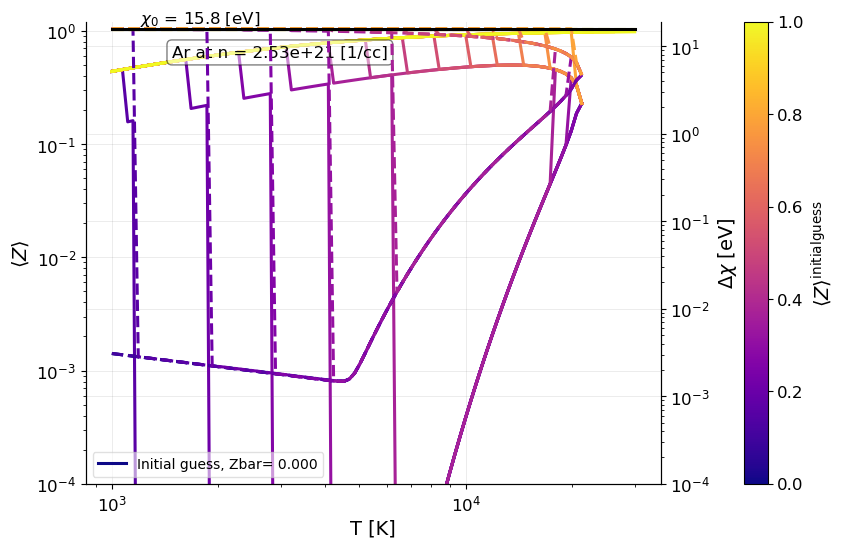

In [226]:
fig, ax = plt.subplots(figsize=(10,6))

# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

colors = plt.cm.plasma(np.linspace(0, 1,len(Saha_list))) #plt.cycler("color", plt.cm.jet(np.linspace(0,1,len(Saha_list))))



ax.set_ylabel(r"$\langle Z \rangle$")#,color=colors[0])
ax.set_xlabel("T [K]")
ax.set_xscale('log')

ax2 = ax.twinx()
# ax2.plot(T_K_array, Δχ_Saha*AU_to_eV,'--.',color=colors[1])
ax2.set_ylabel(r"$\Delta \chi$ [eV]")#,color=colors[1])

for i, (Zbar_0, Saha) in enumerate(zip(Zbar_0_list, Saha_list)):
    if i==0:
        try:
            ax.plot(T_K_array, Saha[0],'-' , color=colors[i], label=f'Initial guess, Zbar= {Zbar_0:0.3f}')
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'--' , color=colors[i], label=r'$\chi_0$')
        except TypeError:
            pass
            
    else:
        try:
            ax.plot(T_K_array, Saha[0],'-' , color=colors[i])#, label=f'Initial guess, Zbar= {Zbar_0:0.3f}')
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'--' , color=colors[i])
        except TypeError:
            pass
            
# ax2.plot(T_K_array, Δχ_Saha_1*AU_to_eV,'-' ,color=colors[1])

ax2.plot(T_K_array, np.ones_like(T_K_array)*χ0_AU*AU_to_eV,'-' ,color='k')
ax2.text(np.min(T_K_array)*1.2, 1.01*χ0_AU*AU_to_eV, r"$\chi_0$ = {0:0.1f} [eV]".format(χ0_AU*AU_to_eV), fontsize=12,
        verticalalignment='bottom')#, bbox=props)

# Adding a manual colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
fig.colorbar(sm, ax=[ax, ax2], orientation='vertical', label=r'$\langle Z\rangle^{\rm initial guess}$')

plt.subplots_adjust(right=0.7)

# text
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
inset_text = f"{element} at n = {n0_invcc:0.2e} [1/cc]"
ax.text(0.15, 0.95, inset_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_ylim(1e-4,1.2)
ax2.set_ylim(1e-4,1.2*χ0_AU*AU_to_eV)

ax.set_yscale('log')
ax2.set_yscale('log')
ax.legend()
# plt.tight_layout()

# ax.set_yscale('log')

In [224]:
# Fix nan, None issues...

Zbar_list = np.array([Saha[0] for Saha in Saha_list])
χ0_list   = np.array([Saha[1] for Saha in Saha_list])
Zbar_mean, Zbar_std = np.nanmean(Zbar_list,axis=0), np.nanstd(Zbar_list,axis=0) 
χ0_mean, χ0_std = np.nanmean(χ0_list,axis=0), np.nanstd(χ0_list,axis=0) 


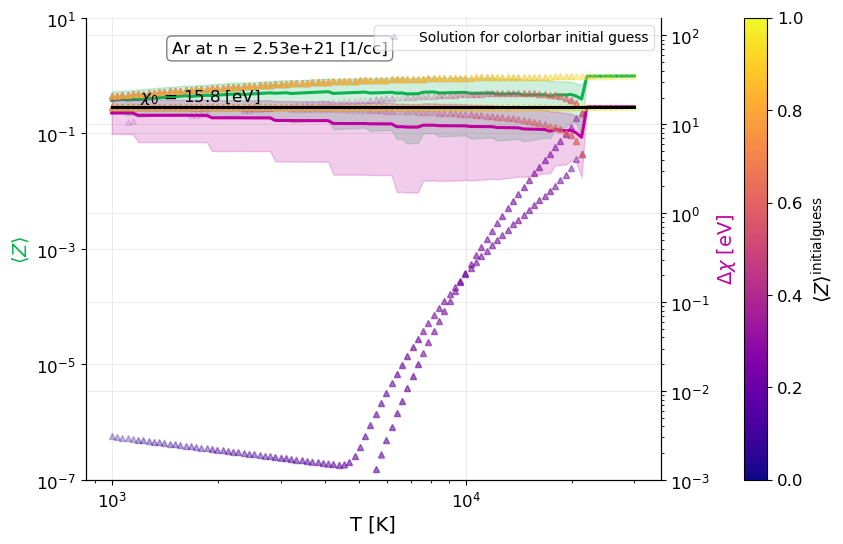

In [225]:
fig, ax = plt.subplots(figsize=(10,6))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.set_ylabel(r"$\langle Z \rangle$",color=colors[0])
ax.set_xlabel("T [K]")
ax.set_xscale('log')

ax2 = ax.twinx()
ax2.set_ylabel(r"$\Delta \chi$ [eV]",color=colors[1])

# Plot mean and Std
ax.plot(T_K_array, Zbar_mean,'-' , color=colors[0])#, label=f'Initial guess')
ax.fill_between(T_K_array, Zbar_mean - Zbar_std, Zbar_mean + Zbar_std, color=colors[0], alpha=0.2)
ax2.plot(T_K_array, χ0_mean*AU_to_eV,'-' , color=colors[1])#, label=r'$\chi_0$')
ax2.fill_between(T_K_array, (χ0_mean - χ0_std)*AU_to_eV, (χ0_mean + χ0_std)*AU_to_eV, color=colors[1], alpha=0.2, linestyle='-')
           

# Plot all actual solution output    
colors = plt.cm.plasma(np.linspace(0, 1,len(Saha_list))) #plt.cycler("color", plt.cm.jet(np.linspace(0,1,len(Saha_list))))

for i, (Zbar_0, Saha) in enumerate(zip(Zbar_0_list, Saha_list)):
    if i==0:
        try:
            ax.plot(T_K_array, Saha[0],'^' , color=colors[i], label=f'Solution for colorbar initial guess', alpha=0.1, markersize=5)
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'^' , color=colors[i], label=r'$\chi_0$', alpha=0.1, markersize=5)
        except TypeError:
            pass
            
    else:
        try:
            ax.plot(T_K_array, Saha[0],'^' , color=colors[i],alpha=0.1, markersize=5)
            ax2.plot(T_K_array, Saha[1]*AU_to_eV,'^' , color=colors[i],alpha=0.1, markersize=5)
        except TypeError:
            pass


# Plot χ0 Line
ax2.plot(T_K_array, np.ones_like(T_K_array)*χ0_AU*AU_to_eV,'-' ,color='k')
ax2.text(np.min(T_K_array)*1.2, 1.01*χ0_AU*AU_to_eV, r"$\chi_0$ = {0:0.1f} [eV]".format(χ0_AU*AU_to_eV), fontsize=12,
        verticalalignment='bottom')#, bbox=props)

# Adding a manual colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
fig.colorbar(sm, ax=[ax, ax2], orientation='vertical', label=r'$\langle Z\rangle^{\rm initial guess}$')

plt.subplots_adjust(right=0.7)

# text
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
inset_text = f"{element} at n = {n0_invcc:0.2e} [1/cc]"
ax.text(0.15, 0.95, inset_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_ylim(1e-7,10)
ax2.set_ylim(1e-3,10*χ0_AU*AU_to_eV)

ax.set_yscale('log')
ax2.set_yscale('log')
ax.legend()
# plt.tight_layout()

# ax.set_yscale('log')